# Analysis of the Energy Efficiency Project

## Summary of the data set

The data set used in this project is retrieved from "http://archive.ics.uci.edu/ml/datasets/Energy+efficiency#". It was contributed by Angeliki Xifara (angxifara '@' gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis '@' gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK). It contains 768 instances and was donated at 2012-11-30. It has no missing values. It has a total of 10 variables, with 8 of them are attributes(features) and two responses. The authors suggested that the aim of this data set is to use the eight features to predict the two responses. These variables are shown in the table below:

| Variable name in data set| Description |
| --- | --- |
| X1 | Relative Compactness |
| X2 | Surface Area |
| X3 | Wall Area |
| X4 | Roof Area |
| X5 | Overall Height |
| X6 | Orientation |
| X7 | Glazing Area |
| X8 | Glazing Area Distribution |
| y1 | Heating Load |
| y2 | Cooling Load |

## Data pre-processing: partition the data set into training and test sub-data sets

The whole data set were divided into train and test sets, with 70% train data and 30% test data. 

| Number of cases| Sub data set |
| --- | --- |
| 537 | Train set |
| 231 | Test set |

## Exploratory data analysis with the train set

The exploratory data analysis were conducted through the following steps:

1.load in the necessary packages and split the data into train and test sets, NaN were dropped;

2.do EDA on the train set. First to check the data types and see if there are missing values; we found out that there is no missing value. Then we proceed to see the data distribution through bar plots, value_counts, correlations, and pairwise scatter plots. Through the EDA, we could identify that all the variables are numeric type, but Roof Area', 'Surface Area', 'Wall Area', 'Overall Height', 'Orientation', 'Glazing Area', and 'Glazing Area Distribution' are actually categorical.

3.From the above analysis, we may proceed to do a supervised machine learning model with Heating Load and/or Cooling Load as the targets.

**NOTE: Data preprocessing can be conducted using 'data_preprocess.py' in the energy_efficiency_analysis/src folder**

In [1]:
# load the packages
import pandas as pd
import numpy as np
import altair as alt
alt.renderers.enable('mimetype')
from sklearn.model_selection import train_test_split

In [2]:
# read in data set
# rename the attributes
energy_data = pd.read_csv('https://raw.githubusercontent.com/UBC-MDS/energy_efficiency_analysis/main/data/processed/energy_effeciency_processed.csv').dropna()
energy_data = energy_data.rename(columns = {'X1':'Relative Compactness',
                                            'X2':'Surface Area',
                                            'X3':'Wall Area',
                                            'X4':'Roof Area',
                                            'X5':'Overall Height',
                                            'X6':'Orientation',
                                            'X7':'Glazing Area',
                                            'X8':'Glazing Area Distribution',
                                            'Y1':'Heating Load',
                                            'Y2':'Cooling Load'})
train_df, test_df = train_test_split(energy_data, test_size = 0.3, random_state = 4)
# this procedure is saved in the script 'data_preprocess.py' under energy_efficiency_analysis/src/

In [3]:
# check the data types and see if there are missing values
train_df.info()
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 262 to 122
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       537 non-null    float64
 1   Surface Area               537 non-null    float64
 2   Wall Area                  537 non-null    float64
 3   Roof Area                  537 non-null    float64
 4   Overall Height             537 non-null    float64
 5   Orientation                537 non-null    float64
 6   Glazing Area               537 non-null    float64
 7   Glazing Area Distribution  537 non-null    float64
 8   Heating Load               537 non-null    float64
 9   Cooling Load               537 non-null    float64
dtypes: float64(10)
memory usage: 46.1 KB


,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
262,0.76,661.5,416.5,122.50,7.0,4.0,0.10,5.0,32.46,33.64
619,0.64,784.0,343.0,220.50,3.5,5.0,0.40,2.0,19.12,21.93
275,0.69,735.0,294.0,220.50,3.5,5.0,0.10,5.0,11.16,14.39
338,0.98,514.5,294.0,110.25,7.0,4.0,0.25,2.0,28.18,30.18
177,0.69,735.0,294.0,220.50,3.5,3.0,0.10,3.0,11.16,14.27


In [4]:
train_df.describe(include="number")

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,0.765866,670.533520,319.001862,175.765829,5.279330,3.521415,0.233892,2.828678,22.421750,24.709423
std,0.107296,89.237801,42.682258,45.300412,1.751386,1.114695,0.132873,1.575369,10.128379,9.599911
min,0.620000,514.500000,245.000000,110.250000,3.500000,2.000000,0.000000,0.000000,6.010000,10.900000
25%,0.660000,588.000000,294.000000,122.500000,3.500000,3.000000,0.100000,2.000000,13.000000,15.730000
50%,0.760000,661.500000,318.500000,147.000000,7.000000,4.000000,0.250000,3.000000,19.200000,22.720000
75%,0.860000,759.500000,343.000000,220.500000,7.000000,5.000000,0.400000,4.000000,31.530000,33.040000
max,0.980000,808.500000,416.500000,220.500000,7.000000,5.000000,0.400000,5.000000,43.100000,48.030000


**NOTE: The following EDA can be conducted using 'eda_script_plots_update.py' in the energy_efficiency_analysis/src folder**

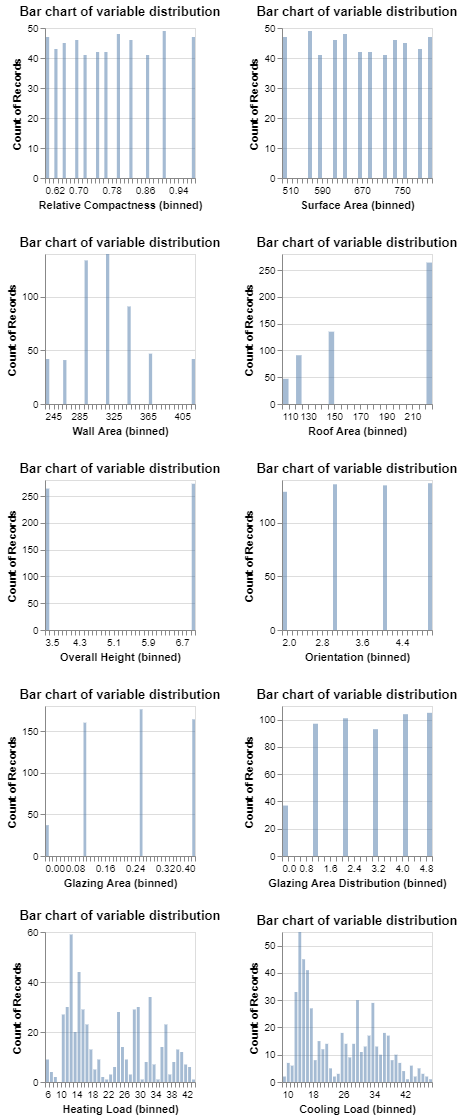

In [5]:
# check the distribution of all variables
column_list = train_df.columns.tolist()

distri_chart = alt.Chart(train_df, 
                         title = 'Bar chart of variable distribution'
                        ).mark_bar(opacity = 0.5).encode(
    alt.X (alt.repeat(),
           type = 'quantitative',
          bin = alt.Bin(maxbins = 45)),
    alt.Y('count()', stack = None),
    tooltip = 'count()'
).properties(width = 150,
            height = 150).repeat(
repeat = column_list,
columns = 2)

distri_chart

In [6]:
# correlation matrix
train_df.corr('spearman').style.background_gradient()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
Relative Compactness,1.000000,-1.000000,-0.273975,-0.876766,0.868960,-0.020999,-0.032575,-0.016347,0.616066,0.645661
Surface Area,-1.000000,1.000000,0.273975,0.876766,-0.868960,0.020999,0.032575,0.016347,-0.616066,-0.645661
Wall Area,-0.273975,0.273975,1.000000,-0.161283,0.200053,0.010909,0.031878,0.026842,0.455851,0.402992
Roof Area,-0.876766,0.876766,-0.161283,1.000000,-0.933861,0.014048,0.021957,0.012616,-0.788882,-0.792385
Overall Height,0.868960,-0.868960,0.200053,-0.933861,1.000000,-0.017559,-0.005770,-0.000342,0.859324,0.864561
Orientation,-0.020999,0.020999,0.010909,0.014048,-0.017559,1.000000,0.022057,-0.009456,-0.017053,-0.005102
Glazing Area,-0.032575,0.032575,0.031878,0.021957,-0.005770,0.022057,1.000000,0.168925,0.332578,0.285610
Glazing Area Distribution,-0.016347,0.016347,0.026842,0.012616,-0.000342,-0.009456,0.168925,1.000000,0.086050,0.061568
Heating Load,0.616066,-0.616066,0.455851,-0.788882,0.859324,-0.017053,0.332578,0.086050,1.000000,0.971614
Cooling Load,0.645661,-0.645661,0.402992,-0.792385,0.864561,-0.005102,0.285610,0.061568,0.971614,1.000000


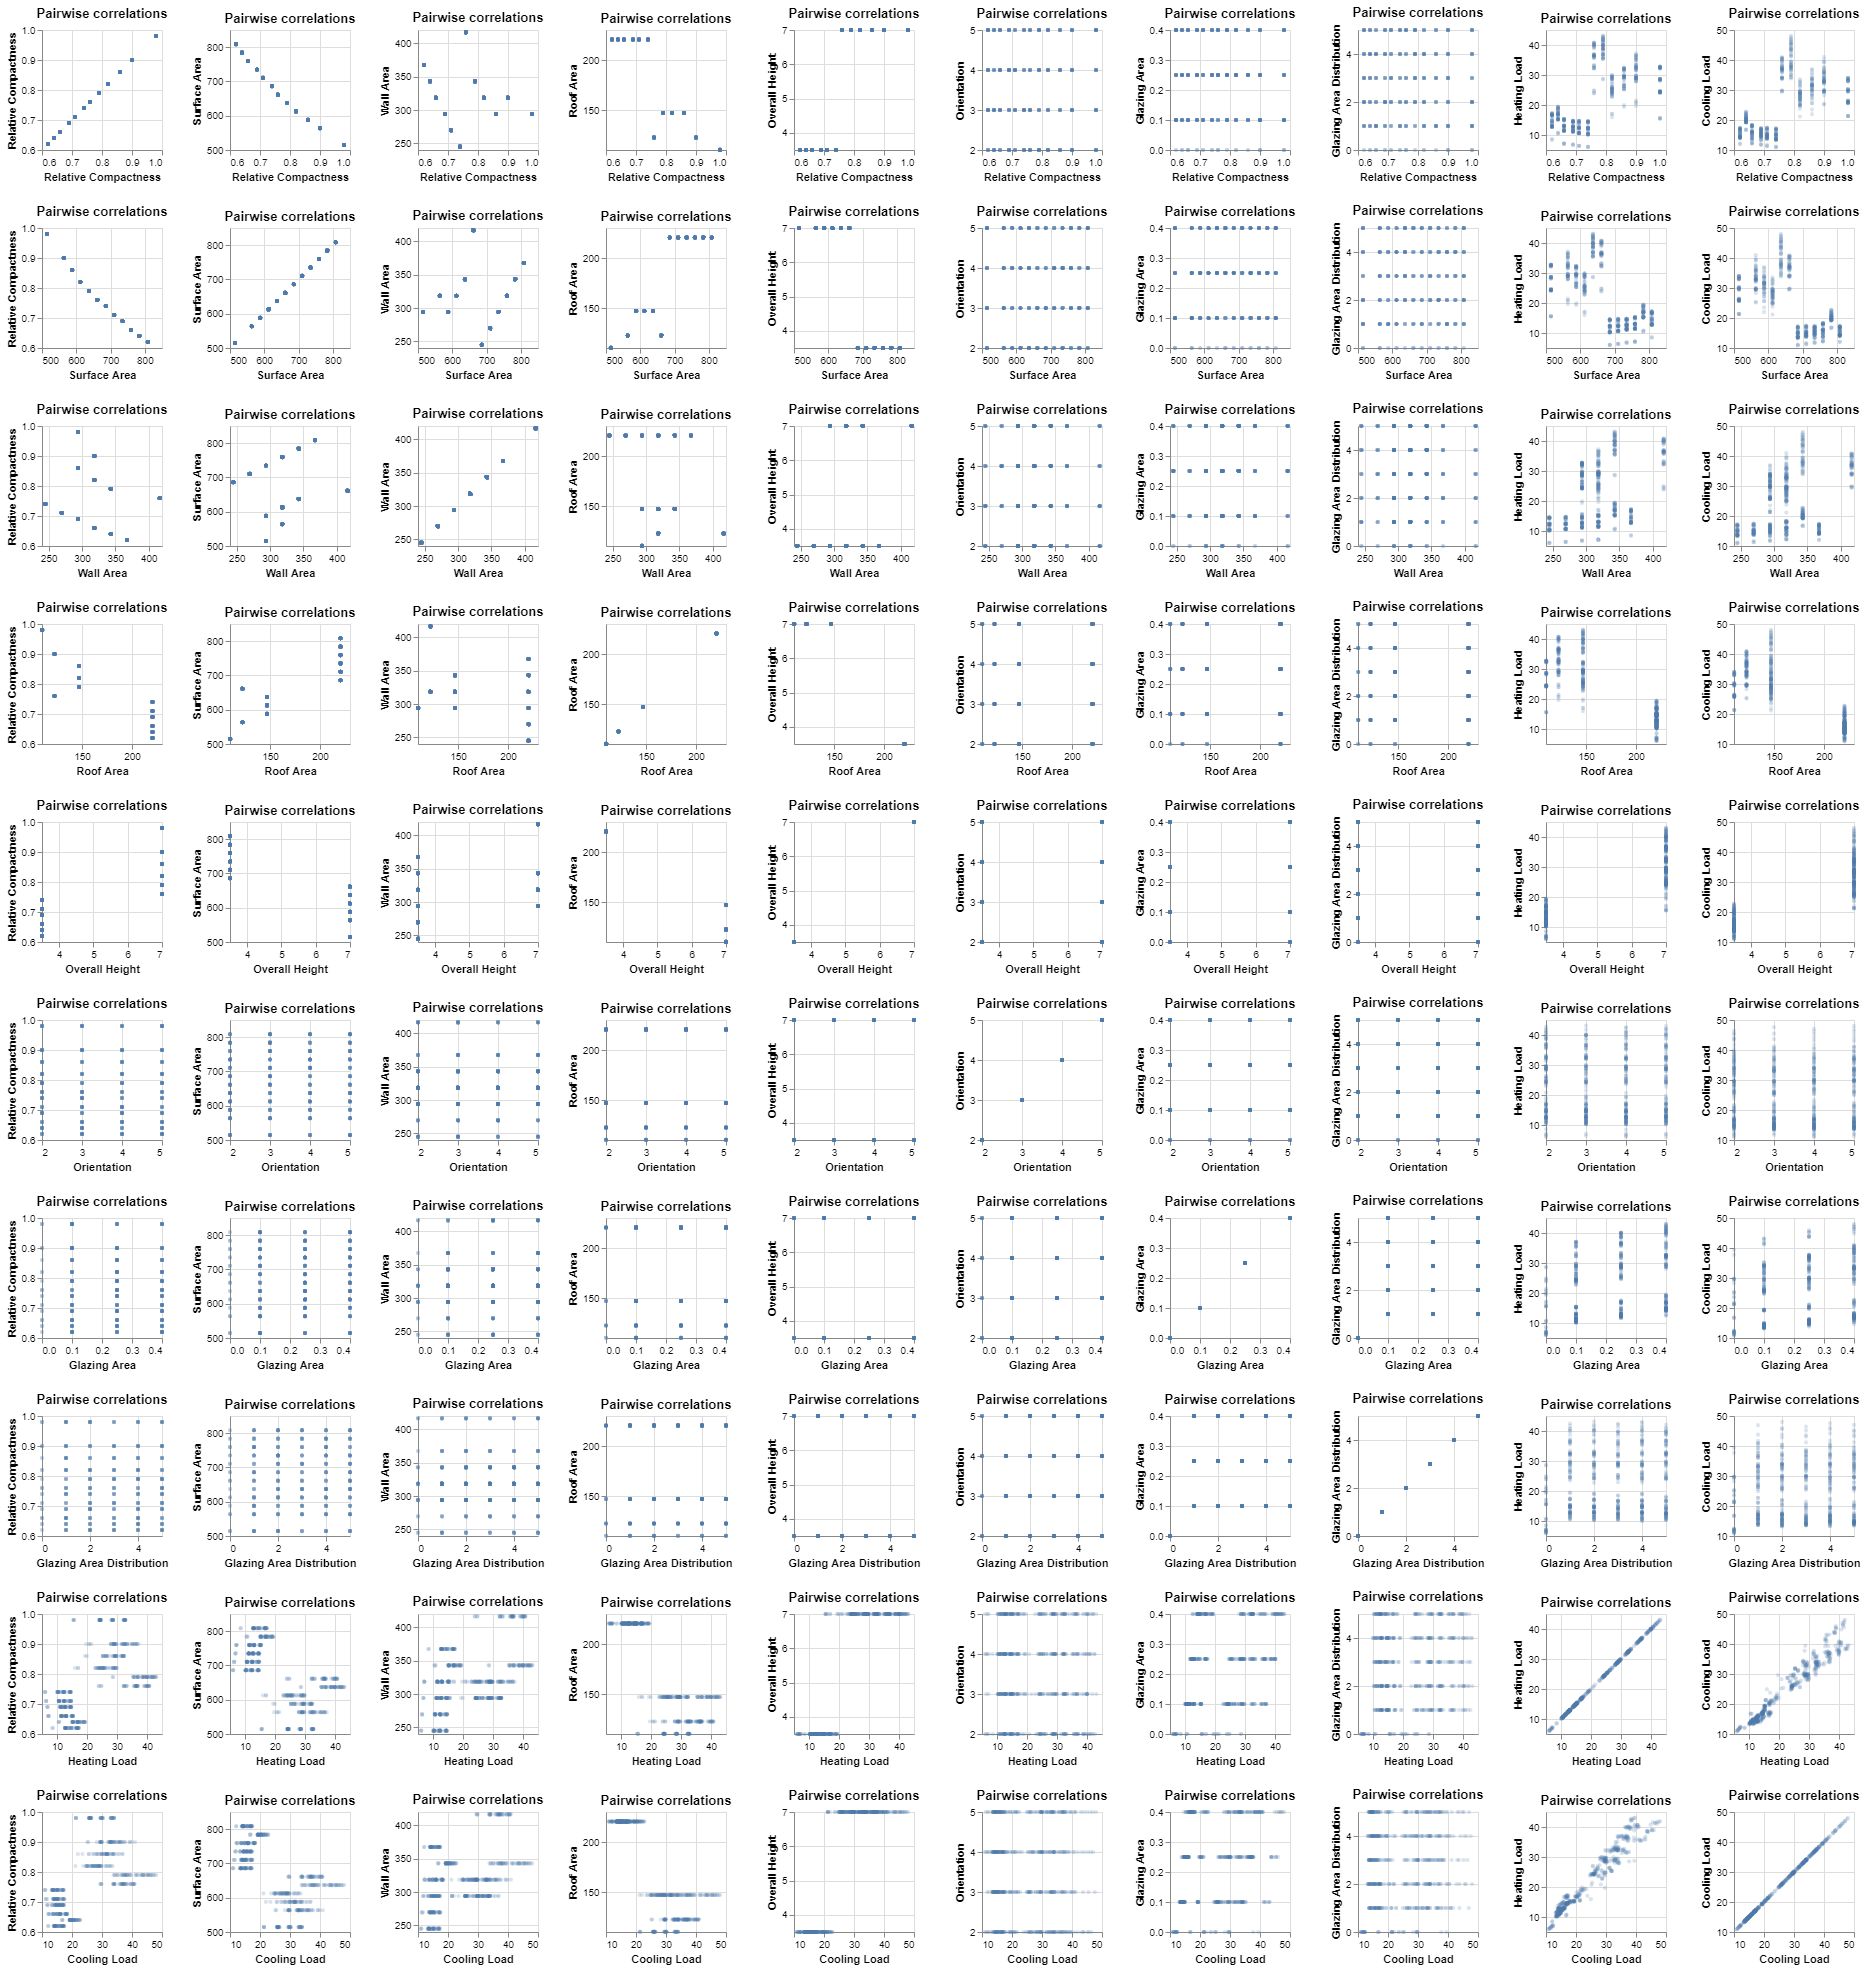

In [7]:
# pairwsie scatter plots

scatters = alt.Chart(train_df,
                    title = 'Pairwise correlations').mark_point(opacity = 0.2,
                                       size = 5).encode(
    alt.X (alt.repeat("row"),
           type = 'quantitative',
           scale = alt.Scale(zero = False)),
    alt.Y(alt.repeat("column"),
          type = 'quantitative',
          scale = alt.Scale(zero = False))
).properties(
    width = 120,
    height = 120
).repeat(
    column = column_list,
    row = column_list
)
# Show the plot
scatters

## Main analysis (please feel free to change the wording)

need to be added by MNBhat

## Limitations

add more here by hu

## Assumptions

add more here by hu

## Future directions

add more here by hu

## References

